In [1]:
from IPython.display import SVG, display

# Declaración de MACROS
base_board = '<svg x="0px" y="0px" width="40%" viewBox="0 0 300 300" style="enable-background:new 0 0 300 300;" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><symbol id="queen" viewBox="000 00 500 550"><path id="queen" d="M477.518 181.966a25 25 0 0 1-34.91 23l-62.29 150.26h-248.92l-62.24-150.19a25 25 0 1 1 9.73-7.29l87 71.2 20.92-126.4a25 25 0 1 1 14.7-1.85l54.31 117 54.42-117.3a25 25 0 1 1 14.58 2.08l20.93 126.42 87.26-71.3a25 25 0 1 1 44.51-15.63zm-71.66 241.25h-300v60h300v-60zm-27.75-52h-244.22v36h244.22v-36z"/></symbol>{}</svg>'
queen = '<use xlink:href="#queen" x="{}" y="{}" width="{}" height="{}" fill="{}" stroke="black" stroke-width="20px"/>'

# Representa un tablero dadas las reinas
def display_board(queens):
    N_size = 300 / len(queens)
    board = base_board
    aux_board = ''
    for i in range(len(queens)):
        for j in range(len(queens)):
            color = ('#eeeed2', '#779455')[(i + j) % 2]  # (light, dark)
            aux_board += '<rect x="{}" y="{}" width="{}" height="{}" fill="{}"/>'.format(
                i*N_size, j*N_size, N_size, N_size, color)
    
    # Different color for collisions
    for i in range(len(queens)):
        collision = False
        if queens[i] >= 0 and queens[i] < len(queens):
            for j in range(len(queens)):
                if i != j and (queens[j] == queens[i] or abs(queens[j] - queens[i]) == abs(j - i)):
                    collision = True
                    aux_board += queen.format(i*N_size, queens[i]*N_size, N_size, N_size, '#ff4c4c')
                    break
            if not collision:
                aux_board += queen.format(i*N_size, queens[i]*N_size, N_size, N_size, 'white')


    board = board.format(aux_board)
    display(SVG(data=board))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     7.38423          7.00    89.92%    33.23%     0:00:20     0:00:40

Nº collisions 0
Nº epochs 262985


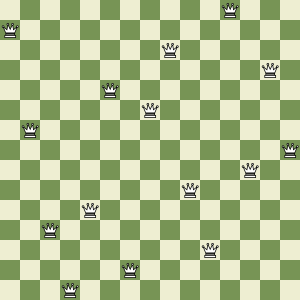

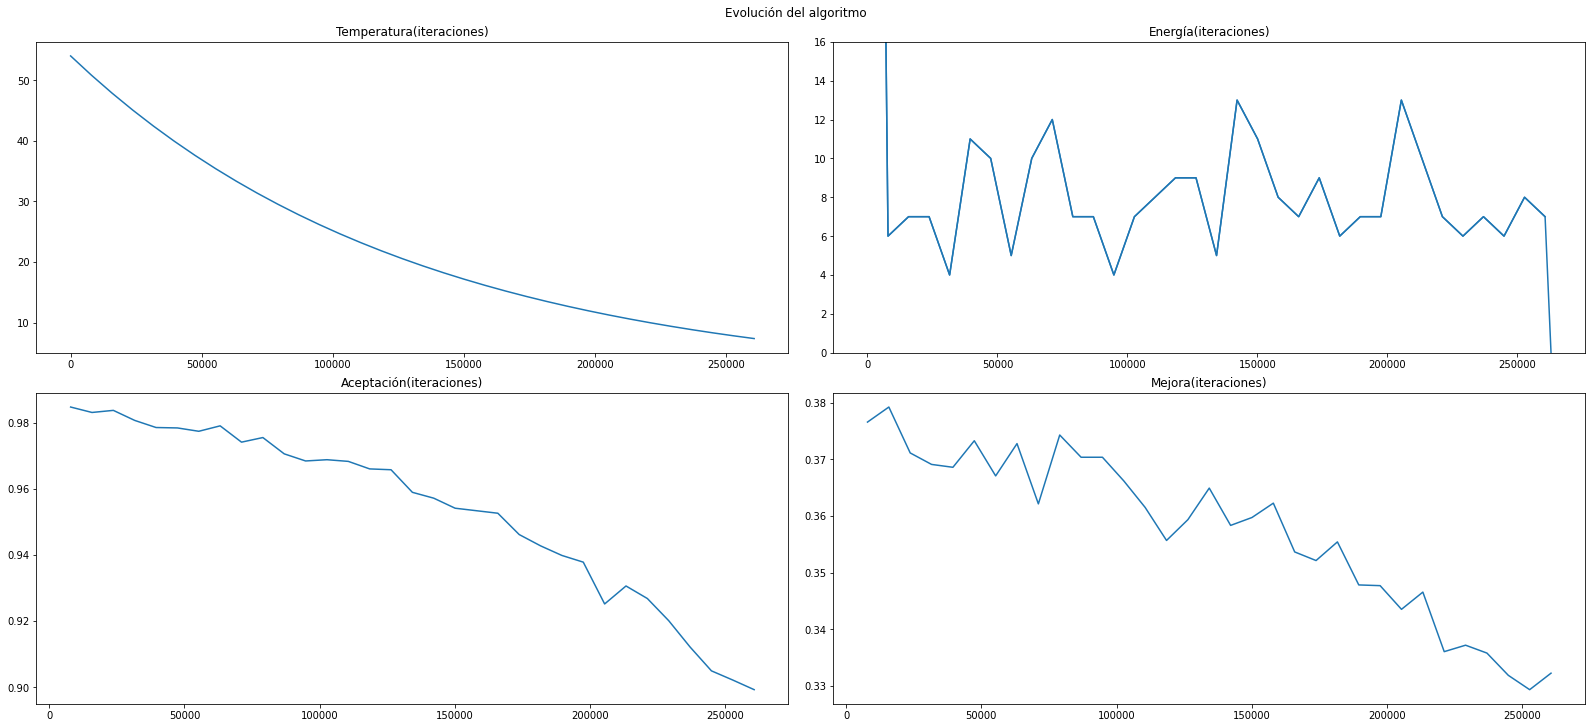

In [2]:
from NReinas import NQueensBaseAnnealer

N = 15
ann = NQueensBaseAnnealer(n_queens=N)
schedule = ann.auto(minutes=1)
ann = NQueensBaseAnnealer(n_queens=N)
ann.set_schedule(schedule)
best_sol, best_cost = ann.anneal()
print(f'Nº collisions {best_cost}')
print(f'Nº epochs {ann.epochs}')
display_board(best_sol)
ann.plot_evolution()